# 🧠 Recommendation System Notebook
This notebook demonstrates logic for user-based collaborative filtering and popular item recommendations.

📦 推荐数据预览：


,user_id,conversion_score,recommended_items,method_used
0,U0082,0.79,"['I001', 'I002', 'I003']",conversion_score + hot_items
1,U0137,0.71,"['I001', 'I002', 'I003']",conversion_score + hot_items
2,U0093,0.70,"['I001', 'I002', 'I003']",conversion_score + hot_items
3,U0186,0.65,"['I001', 'I002', 'I003']",conversion_score + hot_items
4,U0164,0.64,"['I001', 'I002', 'I003']",conversion_score + hot_items


/var/folders/23/nj5v0cjj4wggtzjskd95z3k00000gn/T/ipykernel_11440/1937518203.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x="conversion_score", y="user_id", palette="coolwarm")


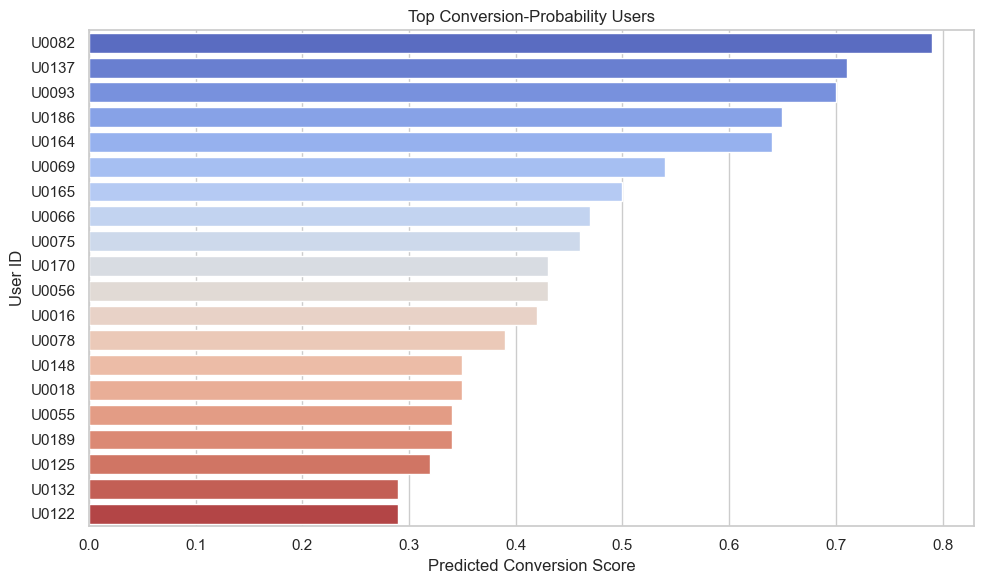

/var/folders/23/nj5v0cjj4wggtzjskd95z3k00000gn/T/ipykernel_11440/1937518203.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_df.head(10), x="count", y="item_id", palette="viridis")


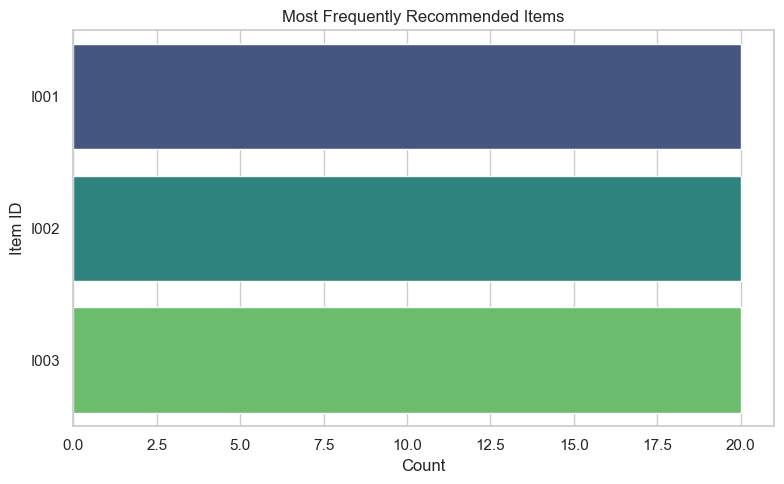

📄 推荐表格（前10条）：


,user_id,conversion_score,recommended_items,method_used
0,U0082,0.79,"['I001', 'I002', 'I003']",conversion_score + hot_items
1,U0137,0.71,"['I001', 'I002', 'I003']",conversion_score + hot_items
2,U0093,0.70,"['I001', 'I002', 'I003']",conversion_score + hot_items
3,U0186,0.65,"['I001', 'I002', 'I003']",conversion_score + hot_items
4,U0164,0.64,"['I001', 'I002', 'I003']",conversion_score + hot_items
5,U0069,0.54,"['I001', 'I002', 'I003']",conversion_score + hot_items
6,U0165,0.50,"['I001', 'I002', 'I003']",conversion_score + hot_items
7,U0066,0.47,"['I001', 'I002', 'I003']",conversion_score + hot_items
8,U0075,0.46,"['I001', 'I002', 'I003']",conversion_score + hot_items
9,U0056,0.43,"['I001', 'I002', 'I003']",conversion_score + hot_items


In [3]:
# ✅ 加载推荐结果并进行分析 + 可视化 + 保存图像
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

sns.set(style="whitegrid")
%matplotlib inline

# 输出目录
os.makedirs("output/recommendations", exist_ok=True)

# 加载推荐数据
rec_df = pd.read_csv("/Users/zipengzhu/Desktop/ecommerce_recommender_template/output/recommendations.csv")

# 查看前几行
print("📦 推荐数据预览：")
display(rec_df.head())

# --- 📊 Top 转化概率用户可视化 ---
plt.figure(figsize=(10, 6))
top_users = rec_df.sort_values("conversion_score", ascending=False).head(20)
sns.barplot(data=top_users, x="conversion_score", y="user_id", palette="coolwarm")
plt.title("Top Conversion-Probability Users")
plt.xlabel("Predicted Conversion Score")
plt.ylabel("User ID")
plt.tight_layout()
plt.savefig("output/recommendations/top_users.png")
plt.show()

# --- 🔁 推荐商品出现频率 ---
all_items = sum(rec_df["recommended_items"].apply(eval).tolist(), [])
item_counts = Counter(all_items)
item_df = pd.DataFrame(item_counts.items(), columns=["item_id", "count"]).sort_values("count", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=item_df.head(10), x="count", y="item_id", palette="viridis")
plt.title("Most Frequently Recommended Items")
plt.xlabel("Count")
plt.ylabel("Item ID")
plt.tight_layout()
plt.savefig("output/recommendations/top_items.png")
plt.show()

# --- 📋 展示最终推荐表格 ---
print("📄 推荐表格（前10条）：")
display(rec_df.head(10))